# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('SINASC_RO_2019.csv')
print(df.head())  # Exibe as primeiras linhas do arquivo

# Certifique-se de instalar o PyPDF2
import PyPDF2

# Abrir o arquivo PDF
with open('Estrutura_SINASC_para_CD.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    num_pages = len(reader.pages)

    # Ler e exibir o conteúdo de todas as páginas
    for page_num in range(num_pages):
        page = reader.pages[page_num]
        print(page.extract_text())


   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

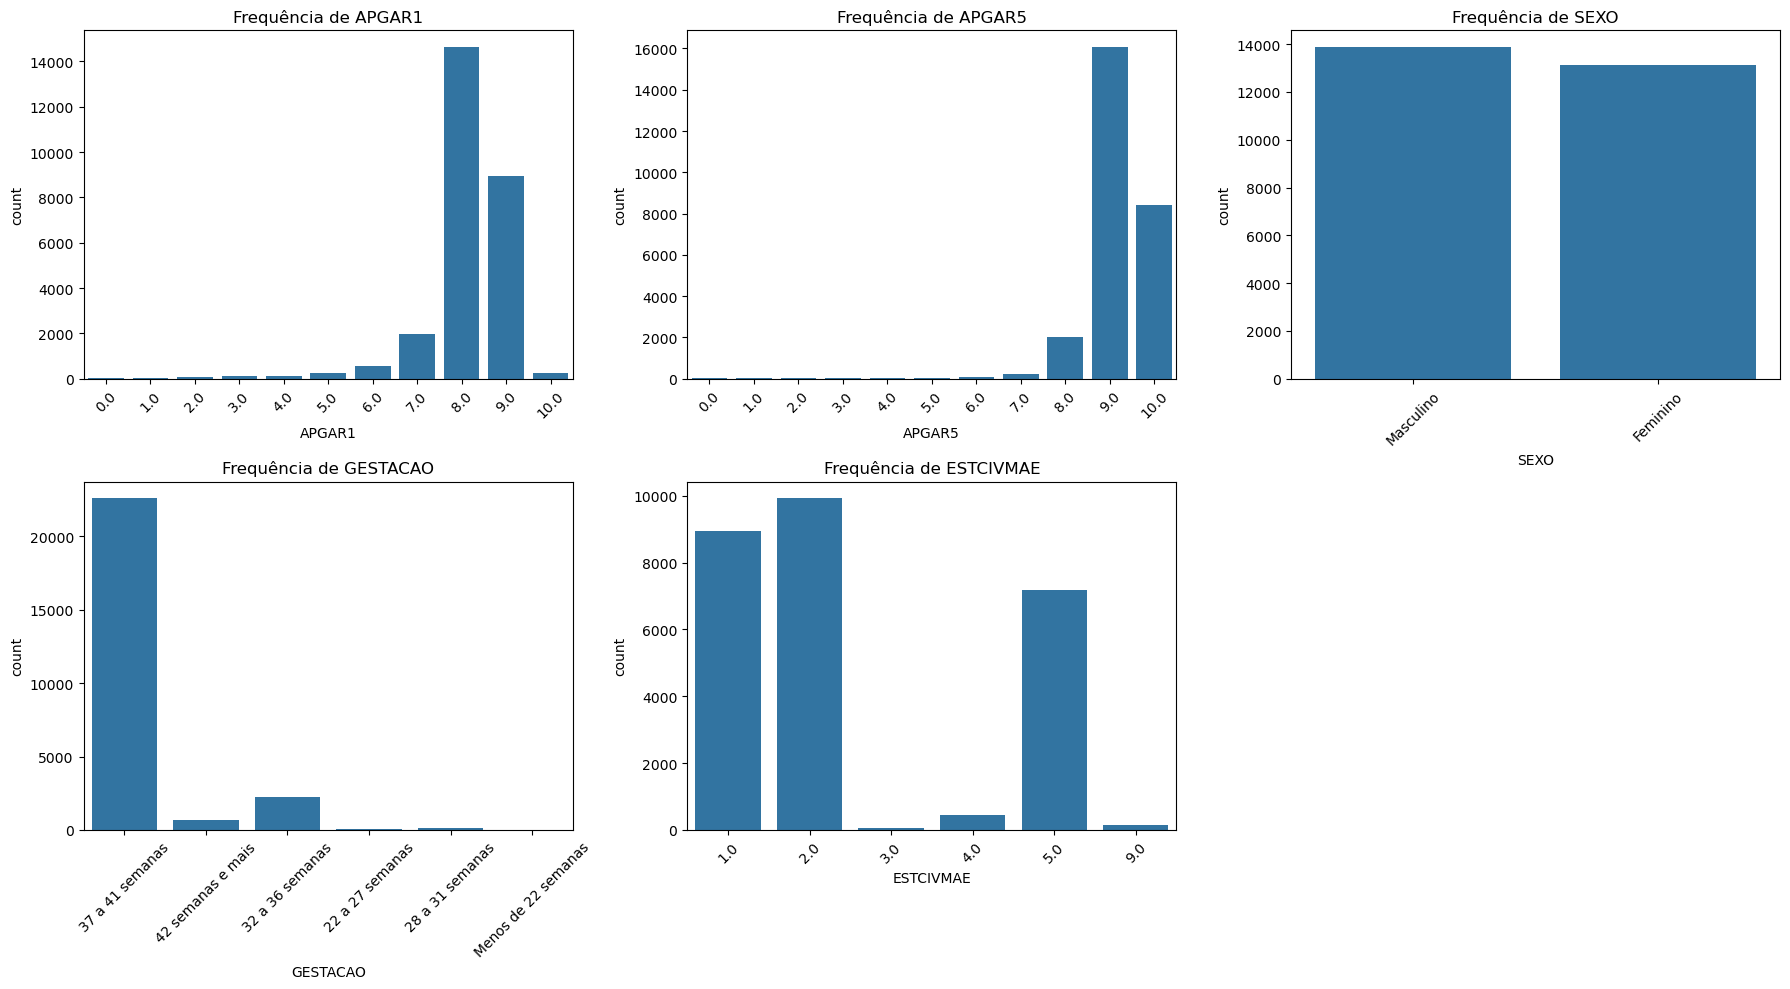

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('SINASC_RO_2019.csv')

# Colunas de interesse
cols = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# Definindo o tamanho da figura
plt.figure(figsize=(18, 10))

# Criando gráficos de barras para cada variável
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Frequência de {col}')
    plt.xticks(rotation=45)

# Ajustar o layout
plt.tight_layout()
plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

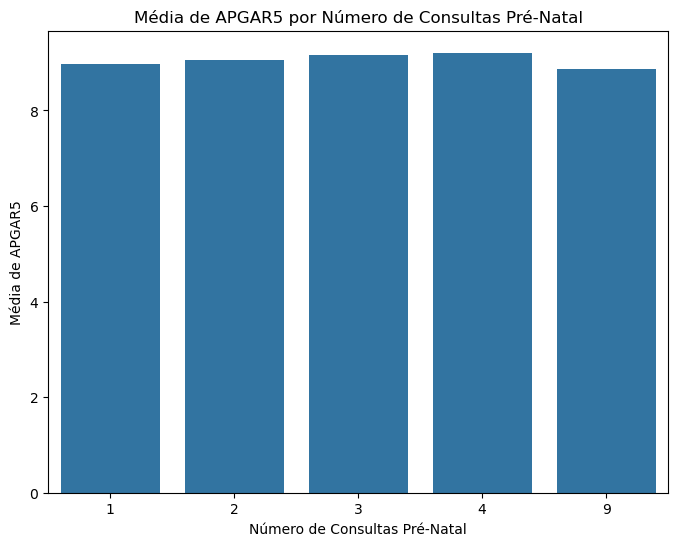

In [10]:
# Remover valores nulos de APGAR5 e CONSULTAS
df_filtered = df[['CONSULTAS', 'APGAR5']].dropna()

# Converter APGAR5 para numérico, caso seja necessário
df_filtered['APGAR5'] = pd.to_numeric(df_filtered['APGAR5'], errors='coerce')

# Agrupar por CONSULTAS e calcular a média de APGAR5
mean_apgar5_by_consultas = df_filtered.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=mean_apgar5_by_consultas)
plt.title('Média de APGAR5 por Número de Consultas Pré-Natal')
plt.xlabel('Número de Consultas Pré-Natal')
plt.ylabel('Média de APGAR5')
plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

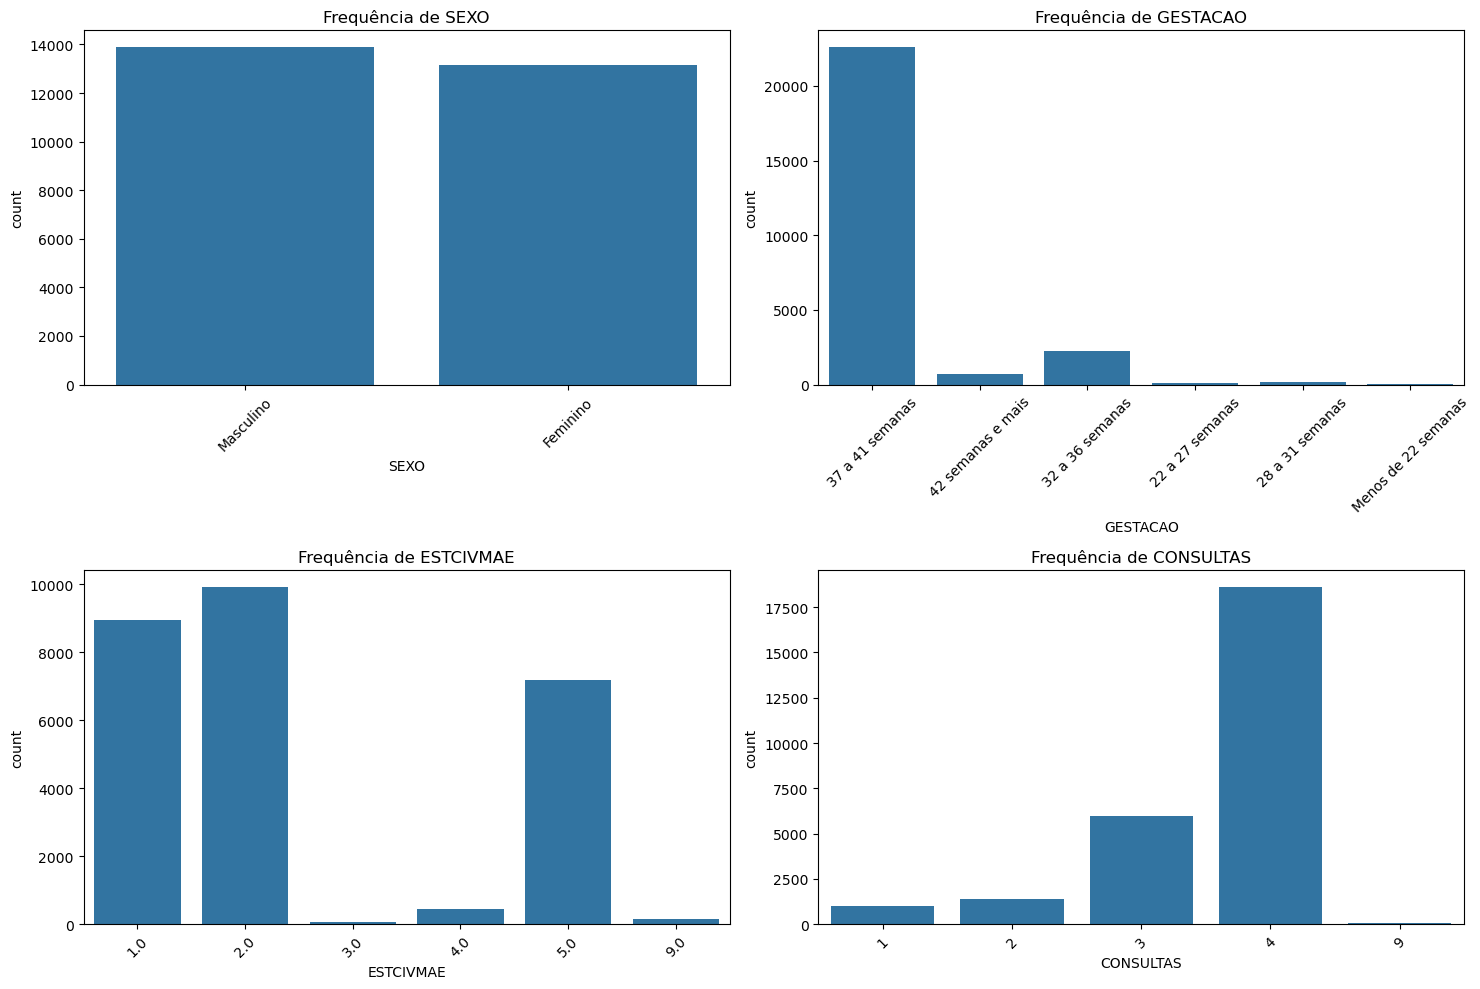

In [8]:


# Definindo o tamanho da figura
plt.figure(figsize=(15, 10))

# Criando gráficos de barras para SEXO
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='SEXO')
plt.title('Frequência de SEXO')
plt.xticks(rotation=45)

# Criando gráficos de barras para GESTACAO
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='GESTACAO')
plt.title('Frequência de GESTACAO')
plt.xticks(rotation=45)

# Criando gráficos de barras para ESTCIVMAE
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='ESTCIVMAE')
plt.title('Frequência de ESTCIVMAE')
plt.xticks(rotation=45)

# Criando gráficos de barras para CONSULTAS
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='CONSULTAS')
plt.title('Frequência de CONSULTAS')
plt.xticks(rotation=45)

# Ajustar o layout
plt.tight_layout()
plt.show()
